# Problem

\begin{equation}\label{eq:problem_open1}
	\frac{\partial u}{\partial t} = \frac{ \partial }{\partial x}(u \frac{\partial u}{\partial x}) = \frac{\partial u}{\partial x}.\frac{\partial u}{\partial x} + u. \frac{\partial^2 u}{\partial x^2} 
\end{equation}

# Discretization

\begin{equation*}
	N_i = \frac{\partial u}{\partial x} = \frac{u_{i+1}^{n+1} - u_{i-1}^{n+1}}{ 2 \Delta x}
\end{equation*}

\begin{equation*}
	M_i = u_i
\end{equation*}


\begin{equation}\label{eq:desc1}
	\frac{u_{i}^{n+1} - u_{i}^{n}}{ \Delta t} = N_i. \frac{u_{i+1}^{n+1} - u_{i-1}^{n+1}}{2 \Delta x} + M_i . \frac{u_{i+1}^{n+1} - 2.u_i^{n+1} + u_{i-1}^{n+1}}{  \Delta x^2}
\end{equation}

# Formulation

\begin{equation*}
	\alpha = \frac{N_i . \Delta t}{2 \Delta x}; \;\;\;\;\;\;\; \beta = \frac{M_i . \Delta t}{\Delta x^2}
\end{equation*}

\begin{equation}\label{eq:psmid}
	u_i^{n+1} = \frac{1}{1 + 2\beta}[(\beta + \alpha)u_{i+1}^{n+1} +(\beta - \alpha)u_{i-1}^{n+1} + u_i^n]
\end{equation}

# PSOR

\begin{equation}\label{eq:psmid2}
	u_i^{n+1,k+1} = u_i^{n+1,k} + \frac{1}{1 + 2\beta}[(\alpha + 1)u_{i+1}^{n+1,k} +(\alpha + 1)u_{i-1}^{n+1,k} + u_i^n (1+2\beta)u_i^{n+1,k}]
\end{equation}

# adding relaxation factor

\begin{equation}
	u_i^{n+1,k+1} = (1-\omega)u_i^{n+1,k} + \frac{\omega}{1 + 2\beta}[(\beta + \alpha)u_{i+1}^{n+1,k} +(\beta - \alpha)u_{i-1}^{n+1,k} + u_i^n ]
\end{equation}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
U_0 = 1.0
U_last = 2.0

L = 1.0

delta_x = 0.02

delta_t = 0.0001

num_x = int(L/delta_x)

target_tol = 0.001

T = 5000

Ws = [0.4,0.7,1.0,1.3,1.6,1.8,1.85]
l = []
for w in Ws:
    U_all = []

    residual_max = []
    residual_mean = []

    U = np.zeros(num_x)
    U[0] = U_0
    U[-1] = U_last
    U_all.append(U)

    for t in range(T):
        Un = U.copy()

        tol = 100
        while tol > target_tol:
            Uold_k = Un.copy()
            for i in range(1,num_x-1):
                N = (Uold_k[i+1] - Uold_k[i-1])/(2*delta_x)
                M = Uold_k[i]

                alpha = (N * delta_t) / (2 * delta_x)
                beta  = (M * delta_t) / (delta_x ** 2)

                Un[i] = (1 - w)*Un[i] + (w/(1 + (2*beta)))*((alpha +beta)*Un[i+1] + (beta - alpha)*Un[i-1] + U[i])

            tol = np.max(np.abs(Uold_k - Un))
            tol_mean = np.max(np.abs(Uold_k - Un))

            residual_max.append(tol)
            residual_mean.append(tol_mean)

            if tol > 10000:
                print("NaN")
                break

        U_all.append(Un)
        U = Un
    l.append((w,residual_max))

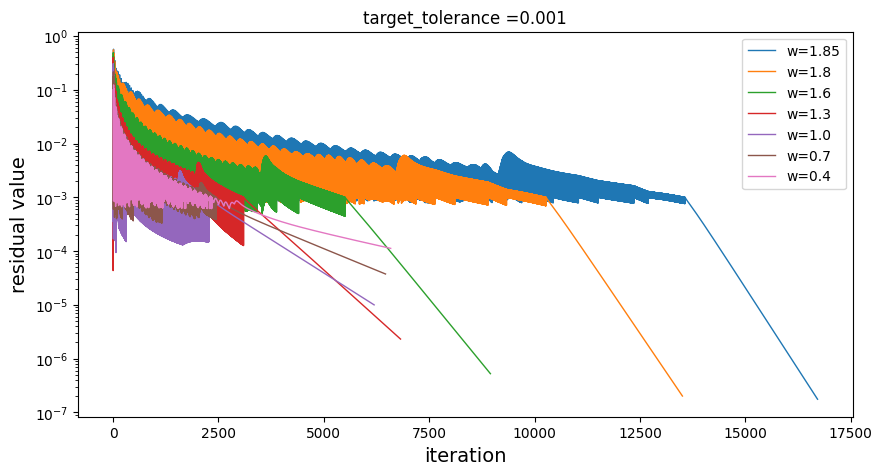

In [4]:
plt.figure(figsize=(10,5))
for i in range(len(Ws)):
    plt.plot(l[len(Ws)-1-i][1],label="w={}".format(l[len(Ws)-1-i][0]),lw=1)
plt.yscale('log')
plt.legend()
plt.xlabel('iteration',fontsize=14)
plt.ylabel('residual value',fontsize=14)
plt.title("target_tolerance ={}".format(target_tol))
plt.savefig("psor_res_3.pdf")

In [5]:
UU = np.stack(U_all)
UU.shape

(5001, 50)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

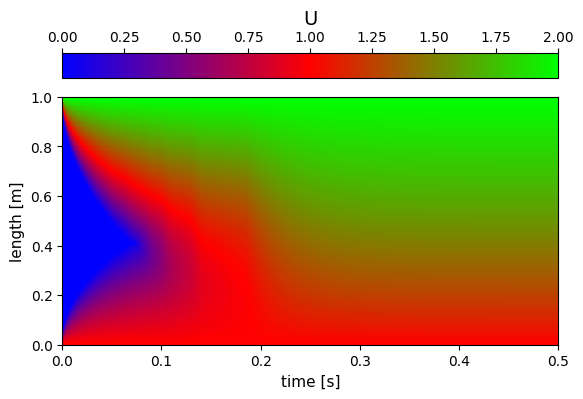

In [6]:


plt.imshow(UU.T,cmap='brg',origin='lower',extent=[0,T*delta_t,0,1],aspect=1/4)
cbar = plt.colorbar(location="top")
cbar.ax.tick_params(labelsize=10)
cbar.set_label("U",fontsize=14)
plt.ylabel("length [m]",fontsize=11)
plt.xlabel("time [s]",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

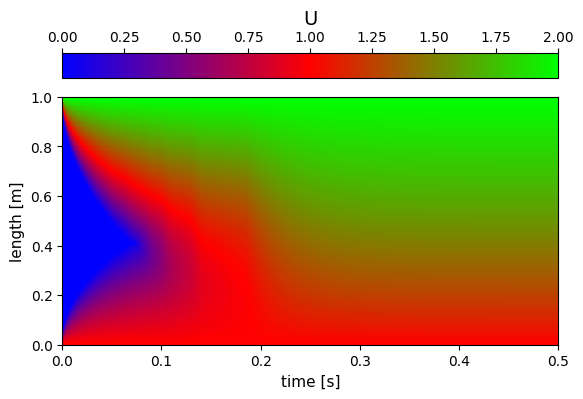

In [7]:
plt.imshow(UU.T,cmap='brg',origin='lower',extent=[0,T*delta_t,0,1],aspect=1/4)
cbar = plt.colorbar(location="top")
cbar.ax.tick_params(labelsize=10)
cbar.set_label("U",fontsize=14)
plt.ylabel("length [m]",fontsize=11)
plt.xlabel("time [s]",fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

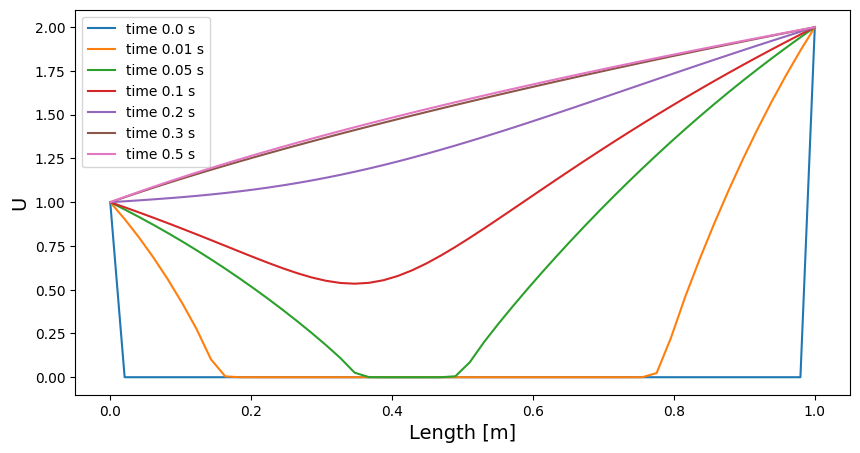

In [9]:
X = np.linspace(0,1,num_x)
plt.figure(figsize=(10,5))
plt.plot(X,UU[0],label='time 0.0 s')
plt.plot(X,UU[100],label='time 0.01 s')
plt.plot(X,UU[500],label='time 0.05 s')
plt.plot(X,UU[1000],label='time 0.1 s')
plt.plot(X,UU[2000],label='time 0.2 s')
plt.plot(X,UU[3000],label='time 0.3 s')
plt.plot(X,UU[5000],label='time 0.5 s')
plt.legend(loc='upper left')
plt.xlabel("Length [m]",fontsize=14)
plt.ylabel("U",fontsize=14)
plt.savefig("times.pdf")